In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
data = pd.read_csv('D:\\Python\\Deep Learning\\Google TensorFlow 2.0 AI and Deep Learning Book5\\kc_house_data.csv')
data.shape

(21613, 21)

In [3]:
pd.options.display.max_columns = 25
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
data['year'] = pd.to_numeric(data['date'].str.slice(0, 4))
data['month'] = pd.to_numeric(data['date'].str.slice(4, 6))
data['day'] = pd.to_numeric(data['date'].str.slice(6, 8))

data.drop(['id'], axis='columns', inplace=True)
data.drop(['date'], axis='columns', inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [6]:
data_num = data.shape[0]
indexes = np.random.permutation(data_num)

train_indexes = indexes[:int(data_num * 0.6)]
val_indexes = indexes[int(data_num * 0.6):int(data_num * 0.8)]
test_indexes = indexes[int(data_num * 0.8):]

train_data = data.loc[train_indexes]
val_data = data.loc[val_indexes]
test_data = data.loc[test_indexes]

In [7]:
train_validation_data = pd.concat([train_data, val_data])
mean = train_validation_data.mean()
std = train_validation_data.std()
train_data = (train_data - mean) / std
val_data = (val_data - mean) / std

In [8]:
x_train = np.array(train_data.drop('price', axis='columns'))
y_train = np.array(train_data['price'])
x_val = np.array(val_data.drop('price', axis='columns'))
y_val = np.array(val_data['price'])

# Model 1 (Normal setting)

In [9]:
model = keras.Sequential(name='model-1')
model.add(layers.Dense(64, activation='relu', input_shape=(21,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1408      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(keras.optimizers.Adam(0.001),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.MeanAbsoluteError()])

In [12]:
model_dir = 'D:/Python/Deep Learning/Google TensorFlow 2.0 AI and Deep Learning Book5/lab2-logs/models/'
os.makedirs(model_dir)

In [13]:
log_dir = os.path.join('lab2-logs', 'model-1')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)

model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-1.h5', monitor='val_mean_absolute_error',
                                             save_best_only=True, mode='min')

In [14]:
history = model.fit(x_train, y_train, batch_size=64, epochs=300, validation_data=(x_val, y_val), callbacks=[model_cbk, model_mckp])

Train on 12967 samples, validate on 4323 samples
Epoch 1/300
12967/12967 [==============================] - 2s 136us/sample - loss: 0.3084 - mean_absolute_error: 0.3454 - val_loss: 0.2108 - val_mean_absolute_error: 0.2887
Epoch 2/300
12967/12967 [==============================] - 1s 52us/sample - loss: 0.2045 - mean_absolute_error: 0.2835 - val_loss: 0.1925 - val_mean_absolute_error: 0.2811
Epoch 3/300
12967/12967 [==============================] - 1s 50us/sample - loss: 0.1774 - mean_absolute_error: 0.2634 - val_loss: 0.1744 - val_mean_absolute_error: 0.2594
Epoch 4/300
12967/12967 [==============================] - 1s 52us/sample - loss: 0.1588 - mean_absolute_error: 0.2467 - val_loss: 0.1692 - val_mean_absolute_error: 0.2490
Epoch 5/300
12967/12967 [==============================] - 1s 49us/sample - loss: 0.1408 - mean_absolute_error: 0.2320 - val_loss: 0.1715 - val_mean_absolute_error: 0.2496
Epoch 6/300
12967/12967 [==============================] - 1s 50us/sample - loss: 0.1335 -

In [15]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

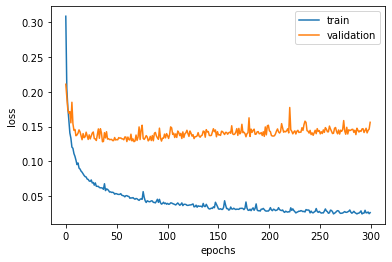

In [16]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

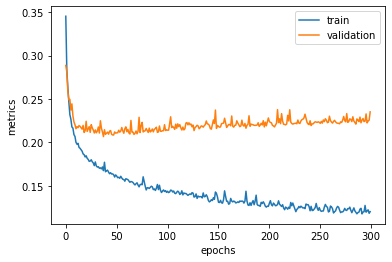

In [17]:
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='validation')
plt.ylabel('metrics')
plt.xlabel('epochs')
plt.legend(loc='upper right')

In [18]:
model.load_weights('D:/Python/Deep Learning/Google TensorFlow 2.0 AI and Deep Learning Book5/lab2-logs/models/Best-model-1.h5')

y_test = np.array(test_data['price'])
test_data = (test_data - mean) / std
x_test = np.array(test_data.drop('price', axis='columns'))

y_pred = model.predict(x_test)
y_pred = np.reshape(y_pred * std['price'] + mean['price'], y_test.shape)

percentage_error = (np.mean(np.abs(y_test - y_pred)) / np.mean(y_test))* 100

print('Model_1 Percentage Error: {:.2f}%'.format(percentage_error))

Model_1 Percentage Error: 13.58%


# TensorBoard

In [19]:
%load_ext tensorboard

In [26]:
%tensorboard --logdir lab2-logs

Reusing TensorBoard on port 6006 (pid 7312), started 21:47:13 ago. (Use '!kill 7312' to kill it.)

# Model 2 (Reduce Neural Network model)

In [28]:
model_2 = keras.Sequential(name='model-2')
model_2.add(layers.Dense(16, activation='relu', input_shape=(21,)))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1))

In [29]:
model_2.compile(keras.optimizers.Adam(0.001),
                loss=keras.losses.MeanSquaredError(),
                metrics=[keras.metrics.MeanAbsoluteError()])

In [30]:
log_dir = os.path.join('lab2-logs', 'model-2')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-2.h5', monitor='val_mean_absolute_error',
                                             save_best_only=True, mode='min')

In [31]:
model_2.fit(x_train, y_train, batch_size=64, epochs=300, validation_data=(x_val, y_val), callbacks=[model_cbk, model_mckp])

Train on 12967 samples, validate on 4323 samples
Epoch 1/300
12967/12967 [==============================] - 1s 72us/sample - loss: 0.7279 - mean_absolute_error: 0.5189 - val_loss: 0.4110 - val_mean_absolute_error: 0.4108
Epoch 2/300
12967/12967 [==============================] - 1s 54us/sample - loss: 0.3557 - mean_absolute_error: 0.3689 - val_loss: 0.2771 - val_mean_absolute_error: 0.3306
Epoch 3/300
12967/12967 [==============================] - 1s 59us/sample - loss: 0.2696 - mean_absolute_error: 0.3208 - val_loss: 0.2415 - val_mean_absolute_error: 0.3132
Epoch 4/300
12967/12967 [==============================] - 1s 68us/sample - loss: 0.2364 - mean_absolute_error: 0.3017 - val_loss: 0.2262 - val_mean_absolute_error: 0.3002
Epoch 5/300
12967/12967 [==============================] - 1s 47us/sample - loss: 0.2160 - mean_absolute_error: 0.2894 - val_loss: 0.2188 - val_mean_absolute_error: 0.2916
Epoch 6/300
12967/12967 [==============================] - 1s 50us/sample - loss: 0.2010 - 

# Model 3 (Weights Regularization)

In [33]:
model_3 = keras.Sequential(name='model-3')
model_3.add(layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu', input_shape=(21,)))
model_3.add(layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'))
model_3.add(layers.Dense(1))

In [34]:
model_3.compile(keras.optimizers.Adam(0.001),
                loss=keras.losses.MeanSquaredError(),
                metrics=[keras.metrics.MeanAbsoluteError()])

In [35]:
log_dir = os.path.join('lab2-logs', 'model-3')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-3.h5', monitor='val_mean_absolute_error',
                                             save_best_only=True, mode='min')

In [36]:
model_3.fit(x_train, y_train, batch_size=64, epochs=300, validation_data=(x_val, y_val), callbacks=[model_cbk, model_mckp])

Train on 12967 samples, validate on 4323 samples
Epoch 1/300
12967/12967 [==============================] - 1s 74us/sample - loss: 0.4789 - mean_absolute_error: 0.3718 - val_loss: 0.3131 - val_mean_absolute_error: 0.3024
Epoch 2/300
12967/12967 [==============================] - 1s 57us/sample - loss: 0.2971 - mean_absolute_error: 0.2891 - val_loss: 0.3114 - val_mean_absolute_error: 0.2980
Epoch 3/300
12967/12967 [==============================] - 1s 54us/sample - loss: 0.2631 - mean_absolute_error: 0.2717 - val_loss: 0.2895 - val_mean_absolute_error: 0.2916
Epoch 4/300
12967/12967 [==============================] - 1s 56us/sample - loss: 0.2488 - mean_absolute_error: 0.2615 - val_loss: 0.2860 - val_mean_absolute_error: 0.2780
Epoch 5/300
12967/12967 [==============================] - 1s 53us/sample - loss: 0.2242 - mean_absolute_error: 0.2491 - val_loss: 0.2386 - val_mean_absolute_error: 0.2495
Epoch 6/300
12967/12967 [==============================] - 1s 52us/sample - loss: 0.2121 - 

# Model 4 (Dropout)

In [38]:
model_4 = keras.Sequential(name='model-4')
model_4.add(layers.Dense(64, activation='relu', input_shape=(21,)))
model_4.add(layers.Dropout(0.3))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dropout(0.3))
model_4.add(layers.Dense(1))

In [39]:
model_4.compile(keras.optimizers.Adam(0.001),
                loss=keras.losses.MeanSquaredError(),
                metrics=[keras.metrics.MeanAbsoluteError()])

In [40]:
log_dir = os.path.join('lab2-logs', 'model-4')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-4.h5', monitor='val_mean_absolute_error',
                                             save_best_only=True, mode='min')

In [41]:
model_4.fit(x_train, y_train, batch_size=64, epochs=300, validation_data=(x_val, y_val), callbacks=[model_cbk, model_mckp])

Train on 12967 samples, validate on 4323 samples
Epoch 1/300
12967/12967 [==============================] - 1s 111us/sample - loss: 0.5014 - mean_absolute_error: 0.4525 - val_loss: 0.2512 - val_mean_absolute_error: 0.3149
Epoch 2/300
12967/12967 [==============================] - 1s 89us/sample - loss: 0.3317 - mean_absolute_error: 0.3632 - val_loss: 0.2363 - val_mean_absolute_error: 0.3113
Epoch 3/300
12967/12967 [==============================] - 1s 82us/sample - loss: 0.2978 - mean_absolute_error: 0.3382 - val_loss: 0.2059 - val_mean_absolute_error: 0.2885
Epoch 4/300
12967/12967 [==============================] - ETA: 0s - loss: 0.2612 - mean_absolute_error: 0.319 - 1s 79us/sample - loss: 0.2624 - mean_absolute_error: 0.3193 - val_loss: 0.2158 - val_mean_absolute_error: 0.2937
Epoch 5/300
12967/12967 [==============================] - 1s 84us/sample - loss: 0.2491 - mean_absolute_error: 0.3112 - val_loss: 0.1864 - val_mean_absolute_error: 0.2808
Epoch 6/300
12967/12967 [===========

# Evaluate different model

## Model 2

In [42]:
model_2.load_weights('D:/Python/Deep Learning/Google TensorFlow 2.0 AI and Deep Learning Book5/lab2-logs/models/Best-model-2.h5')
y_pred = model_2.predict(x_test)
y_pred = np.reshape(y_pred * std['price'] + mean['price'], y_test.shape)
percentage_error = (np.mean(np.abs(y_test - y_pred)) / np.mean(y_test)) * 100
print('Model_2 Percentage Error: {:.2f}%'.format(percentage_error))

Model_2 Percentage Error: 13.48%


## Model 3

In [43]:
model_3.load_weights('D:/Python/Deep Learning/Google TensorFlow 2.0 AI and Deep Learning Book5/lab2-logs/models/Best-model-3.h5')
y_pred = model_3.predict(x_test)
y_pred = np.reshape(y_pred * std['price'] + mean['price'], y_test.shape)
percentage_error = (np.mean(np.abs(y_test - y_pred)) / np.mean(y_test)) * 100
print('Model_3 Percentage Error: {:.2f}%'.format(percentage_error))

Model_3 Percentage Error: 12.82%


## Model 4

In [44]:
model_4.load_weights('D:/Python/Deep Learning/Google TensorFlow 2.0 AI and Deep Learning Book5/lab2-logs/models/Best-model-4.h5')
y_pred = model_4.predict(x_test)
y_pred = np.reshape(y_pred * std['price'] + mean['price'], y_test.shape)
percentage_error = (np.mean(np.abs(y_test - y_pred)) / np.mean(y_test)) * 100
print('Model_4 Percentage Error: {:.2f}%'.format(percentage_error))

Model_4 Percentage Error: 13.50%


In [45]:
%tensorboard --logdir lab2-logs

Reusing TensorBoard on port 6006 (pid 7312), started 22:52:27 ago. (Use '!kill 7312' to kill it.)